# Kalorimetrie Küchentischversuch - Wärmekapazität eines Behälters

Author: Keanu Engel

Datum: 17.11.2023

Gruppe: 12

## Forschungsfrage

Formulieren Sie eine oder mehrere Forschungsfragen zu diesem Versuch.

Wie kann ich die Metadaten meiner Sensoren auslesen und speichern?
Wie kann ich die unterschiedlichen Wärmekapazitäten der Behälter bestimmen?
Nach welcher Zeit ist die Temperatur nach dem Zusammenschütten der Flüssigkeiten gleich, bzw. wird diese gleich werden?

## Versuchsaufbau und Durchführung

Beschreiben Sie den Versuchsaufbau und die Versuchsdurchführung. Machen Sie ein Bild von Ihrem Aufbau und nutzen Sie dieses mit zur Beschreibung.

Bei diesem Versuch werden zwei Tassen mit der selben Menge an Wasser verwendet, nämlich 150 ml jeweils. Bei der einen Tasse wird Wasser mit einer Temperatur von 54,25°C zugeführt und bei der anderen kaltes Wasser mit einer Temperatur von 19,69°C. Hierbei werden beide Tassen jeweils ein Temperatursensor hineingetan, der die jeweilige Temperatur der Taseen misst. Anschießend wird die Tasse mit dem warmen Wasser in die Tasse mit dem kalten Wasser geschüttet und dabei mit den beiden Temperatursensoren die Temperatur vor, während und nach der Mischung gemessen und anschlißend in diesem Dokument ausgewertet.


<img src="figures/Versuchsaufbau_heat_capacity_vor_dem_Zusammenschuetten.jpg" width="800">
<img src="figures/Versuchsaufbau_heat_capacity_nach_dem_Zusammenschuetten.jpg" width="800">

## Versuchsauswertung

In [39]:
import numpy as np
from matplotlib import pyplot as plt
# If you plan to write functions in another module,
# you can use importlib.reload(module) to reload the module
# at the beginning of each cell in order to make the latest
# changes take effect without restart the kernel.
import importlib

from functions import m_json

# Use FST-Style, if you don't like it, you can safely delete this line.
plt.style.use("FST.mplstyle")


### Wärmekapazität eines Behälters

Hinweis: Nutzen Sie die Funktionen *get_ids_from_setup* und *get_json_entry* um auf Metadaten zuzugreifen. 

Sie sollten Ihr Programm zwischen TODO und DONE implementieren, und versuchen die Anweisung zu verfolgen. Das ist aber nicht erforderlich.


#### (i) Messdaten einlesen

Messdaten werden in das Notebook eingelesen.

In [40]:
# TODO: Define the path to hdf5 file, which containing experiment data for constant.

# Pfad zur HDF5-Datei
path = '/home/pi/calorimetry_home/data/heat_capacity/heat_capacity.h5'

# DONE #

In [41]:
# TODO: Read all experimental data and associated metadata from HDF5 files for data processing.
# HINT: You can find information about how to access to H5 Files in the README of your Repo.
import h5py

# Dictionary erstellen für die Daten aus der hdf5 Datei
data_sensors = {}

# hdf5 Datei als read only öffnen
with h5py.File(path, 'r') as file:

   # Raw Data abrufen
   raw_data = file['RawData']

    # Für alle Sensor UUids in RawData Temperatur und Timestamp auslesen und als Array speichern
   for sensor_uuids in raw_data:
            
            temperature_data = raw_data[sensor_uuids]['temperature']
            temperature = temperature_data[()]
       
            timestamp_data = raw_data[sensor_uuids]['timestamp']
            timestamp = timestamp_data[()]

            data_sensors[sensor_uuids] = {'temperature': temperature, 'timestamp': timestamp}

#print(data_sensors)
# DONE #

#### (ii) Daten ploten

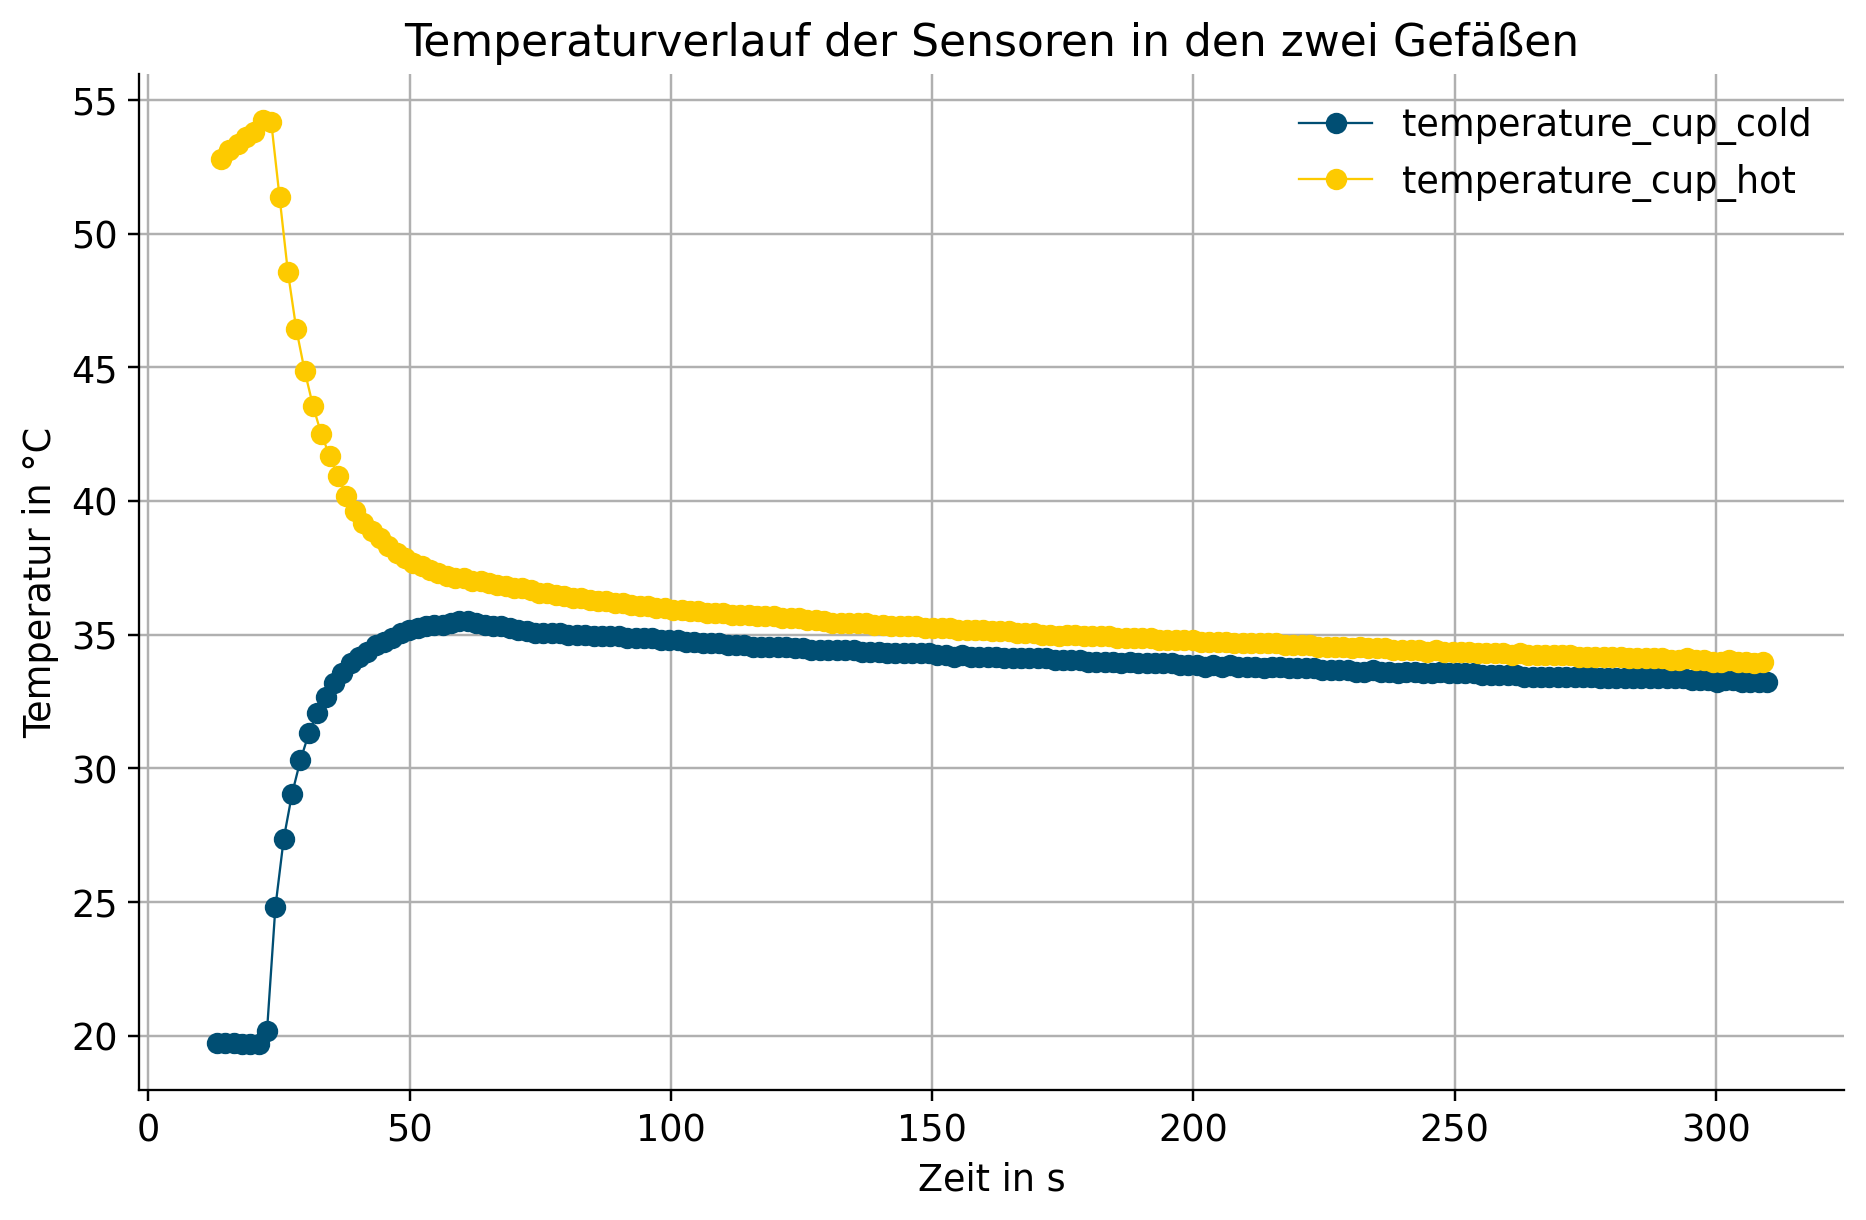

<Figure size 1471.8x1012 with 0 Axes>

In [42]:
# TODO: Use the temperature and time data for plotting
import matplotlib.pyplot as plt
import numpy as np

# Daten extrahieren
sensor1_uuid = '1ee82f6d-695a-695b-9b96-53b66f1fd36f'
sensor2_uuid = '1ee82fc3-53ee-6f2b-af66-fda31bc08fce'

sensor1_data = data_sensors[sensor1_uuid]
sensor2_data = data_sensors[sensor2_uuid]

time1 = sensor1_data['timestamp']
temperature1 = sensor1_data['temperature']

time2 = sensor2_data['timestamp']
temperature2 = sensor2_data['temperature']

# Plot erstellen
plt.figure(figsize=(10, 6))
plt.plot(time1, temperature1, label='temperature_cup_cold', marker='o')
plt.plot(time2, temperature2, label='temperature_cup_hot', marker='o')

# Achsentitel und Diagrammtitel hinzufügen
plt.xlabel('Zeit in s')
plt.ylabel('Temperatur in °C')
plt.title('Temperaturverlauf der Sensoren in den zwei Gefäßen')

# Legende hinzufügen
plt.legend()

# Gitter hinzufügen
plt.grid(True)

# Schriftart festlegen
plt.rcParams['font.family'] = 'Arial'

# Diagramm anzeigen
plt.show()

# Pfad zum Speichern der Datei festlegen
file_path = '/home/pi/calorimetry_home/figures/Temperaturverläufe_heat_capacity.svg'

# Speichern des Graphen als svg
plt.savefig(file_path)

#print(temperature1)

# DONE #

#### (iii) Metadaten auslesen

Die notwendigen Metadaten für die Berechnung der Wärmekapazität wird ausgelesen.

In [43]:
# Heat capacity of Water
water_heat_capacity = 4.18

# TODO: Read mass from the metadata of the experiment.
# Pfad zu der Proben-json-Datei aus dem Archiv
path_mass = '/home/pi/calorimetry_home/data/heat_capacity/archiv/probe_heat_capacity_1ee82f68-3984-6082-b57c-1b4ae0a0c55a.json'

import json

# json-Datei aufrufen
with open(path_mass, 'r') as file:
    mass_json = json.load(file)

# Metadata aud der json-Datei ausgeben lassen
metadata_mass = mass_json.get('probe', {}).get('metadata', {})
#print(metadata_mass)

# DONE #

#### (iV) Anfangs- und Endwert der Temperatur

In [44]:
# TODO: Calculation of temperature data necessary to determine the specific heat capacity
# maximal und minimal Werte definieren, da die Senoren erst kurz nach Beginn 
# der Messung die Höchst bzw. Mindesttemperatur erreicht haben
lowest_temp = np.argmin(temperature1)
highest_temp = np.argmax(temperature2)
T_1 = temperature1[lowest_temp]
T_2 = temperature2[highest_temp]

# Mischtemperaturen der beiden Temperatursensoren
T_M_1 = temperature1[-1]
T_M_2 = temperature2[-1]

# Mischungstemperatur berechnen
T_M = (T_M_1 + T_M_2)/2;

#print(T_1)
#print(T_2)
# DONE #

#### (V) Wärmekapazität bestimmen
$$
C = \frac{m_{add}c_{w}(T_2-T_M)}{T_M - T_1} - m_{cup}c_{w}
$$
Dabei ist $m_{add}$ die Masse vom hinzugefügten Wasser, $T_2$ ist seine Temperatur. Die Masse vom Wasser im Behälter ist $m_{cup}$ und seine Temperatur ist $T_1$. Die Mischungstemperatur ist $T_M$. Die spezifische Wärmekapazität von Wasser ist $c_w$.

In [45]:
# TODO: Calculate heat capacity of the calorimeter
m_add_vor = metadata_mass
m_cup_vor = metadata_mass
c_w = water_heat_capacity

# Umwandlung in Gleitkommazahl
m_add = float(m_add_vor)
m_cup = float(m_cup_vor)

# Berechnen von C und Umrechnung in JkgK
C = (((m_add*c_w*(T_2-T_M))/(T_M-T_1))-m_cup*c_w)/1000
# DONE #

#### (Vi) Ergebnis

In [46]:
# TODO: Print result
print('Heat capacity of the calorimeter: ' + str(C) + ' JkgK')

# DONE #

Heat capacity of the calorimeter: 0.30084753363228695 JkgK


## Diskussion

Analysieren Sie Ihre Ergebnisse aus wissenschaflticher Sicht. Berücksichtigen Sie dabei Ihre oben genannte Forschungsfrage.

Anhand der gegebenen Grafik ist zu erkennen, dass nach 250 s nach Start der Messung die Sensoren die gleiche Temperatur ausgeben. Somit wurde mit diesem Experiment gezeigt, dass die Temperaturwerte sich angleichen und der Versuch korrekt durchgeführt wurde. Zudem lässt sich festhalten, dass die Wärmekapazität des Kaloriemeters einen Wert von 0.3 JkgK annimmt.

## Fazit
Ziehe Sie ein persönliches Fazit zum Versuch.

Ich konnte aus diesem Versuch mitnehmen, wie man die Messdaten über den RaspberryPI ausliest und anschließend vergleichen kann. Außerdem konnte ich lernen, wie man Temperatursensoren anschließt, benutzt und mit einem Programm auslesen kann. Bei erneutem Durchführen von dem Versuch würde ich die Sensoren länger in dem Wasser lassen, damit diese vor dem Start der Messung schon die maximalen und minimalen Temperaturen annehmen würden und ich dann in der Auswertung einfach die Anfangstemperatur benutzen könnte und nicht die minimalen und maximalen Temperaturen benutzen müsste.